## Outliers

In [ ]:
Outliers : Data points which are far from observed values

20 - 60 >> 9995
206 - 300 >> 5 

In [349]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer

In [2]:
array1 = np.random.randint(20,60, size = 20)
array1

array([42, 21, 24, 53, 57, 29, 53, 53, 29, 59, 37, 30, 47, 35, 43, 57, 54,
       44, 34, 39])

In [3]:
array2 = np.array([46, 45, 240, 28, 40, 56, 44, 39, 53, 25, 34, 42, 53, 37, 55, 50, 39,
       41, 45, 31])
array2

array([ 46,  45, 240,  28,  40,  56,  44,  39,  53,  25,  34,  42,  53,
        37,  55,  50,  39,  41,  45,  31])

## How outliers are introduced in the datasets

In [ ]:
1. Instrument Error :
    Blood Pressure (100 - 200)
    80
    280
    
2. Data Entry Error:(HumanErrors)
    Salary (50-80k)
    800000
    Cibil - (300-900)
    750 >> 7550
    
    Ground Truth Values(Data Labelling Team)
    
    Invoice: Extraction
        Amount
        Dates
        Vendor Name
        Ground Truth Values:
            240000
            
3. Intentional Errors:
    Sample Datasets
    
4. Natural Values:
    Age: 30-80 >> 98%
        126, 120

5. Sampling Error(Mixing Data from wrong sources)


## How to Detect Outliers

In [ ]:
1. z-score(Normally Distributed Data)
2. IQR Method (Skewed Data)
3. Boxplot (Univariate + Multivariate)
4. Scatter Plot(Multivariate)
5. Percentile(1-5 or 95-99%)

## How to Handle Outliers

In [ ]:
1. Delete Observation(Trimming)
2. Imputation Techniques:
    1. Median
    2. Mean
    3. Lower Tail
    4. Upper Tail
    5. Zero
    6. Static Value(Depend on understanding of feature)
    
3. Transformation Techniques:
    1. Log Transformation
    2. Power Transformer:
        1. Box Cox Transormation (Skewed Data >> Positive Values)
        2. Yeo- Johnson Transformatiom(Skewed Data >> Positive Values)
    3. Square Root Transormation
    4. Cube Root Transormation
    5. Reciprocal Transformation
    6. Standardization (Scaling)

## Impact of Outliers on ML Algorithms

### 1. Sensitive to Outliers

In [ ]:
1. Linear Regression
2. Logistic Regression
3. K-Nearest Neighbours
4. Support Vector Machine
5. K-Means Clustring


### 2. Not Sensitive to Outliers

In [ ]:
1. Decision Tree
2. Random Forest 
3. AdaBoost
4. Gradient Boost
5. XGBoost
6. Naive Bayes

<AxesSubplot:ylabel='Density'>

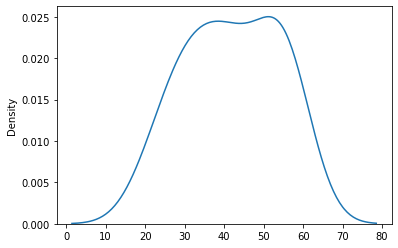

In [4]:
sns.kdeplot(array1)

<AxesSubplot:ylabel='Density'>

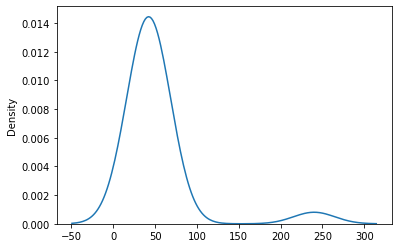

In [5]:
sns.kdeplot(array2)

<AxesSubplot:>

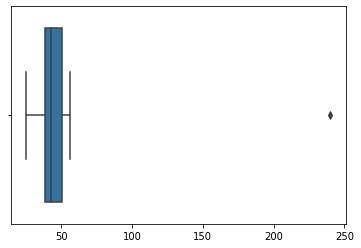

In [6]:
sns.boxplot(x = array2)

In [7]:
array3 = np.array([46, 45, 140, 28, 40, 56, 44, 39, 53, -125, 34, 42, 53, 37, 55, 50, 39,
       41, 45, 31])
array3

array([  46,   45,  140,   28,   40,   56,   44,   39,   53, -125,   34,
         42,   53,   37,   55,   50,   39,   41,   45,   31])

<AxesSubplot:>

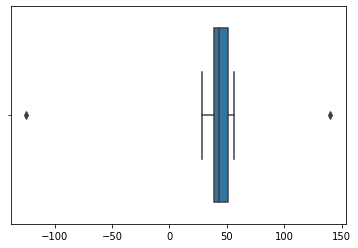

In [8]:
sns.boxplot(x = array3)

In [9]:
np.median(array3)

43.0

# Outliers Detection 

## 1. Z-Score Method

In [10]:
from scipy.stats import skew

In [11]:
array2 = np.array([46, 45, 240, 28, 40, 56, 44, 39, 53, 25, 34, 42, 53, 37, 55, 50, 39,
       41, 45, 31])
array2

array([ 46,  45, 240,  28,  40,  56,  44,  39,  53,  25,  34,  42,  53,
        37,  55,  50,  39,  41,  45,  31])

<AxesSubplot:ylabel='Density'>

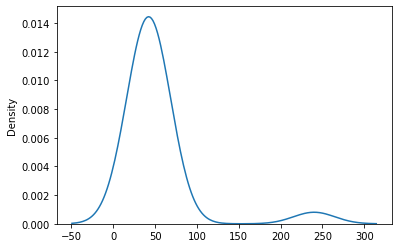

In [12]:
sns.kdeplot(array2)

In [13]:
skew(array2)

3.87617079153527

In [14]:
array2 = np.array([46, 45, 240, 28, 40, 56, 44, 39, 53, 25, 34, 42, 53, 37, 55, 50, 39,
       41, 45, 31])
mean = np.mean(array2)
print("Mean of an Array is :",mean)

std = np.std(array2)
print("Standard Deviation of an array is :",std)

Mean of an Array is : 52.15
Standard Deviation of an array is : 43.91500313104851


In [15]:
x = 46
z_score_x = (x - mean)/std
z_score_x

-0.1400432554142724

In [16]:
x = 45
z_score_x = (x - mean)/std
z_score_x

-0.16281451645724354

In [17]:
x = 31
z_score_x = (x - mean)/std
z_score_x

-0.48161217105883936

In [18]:
x = 240
z_score_x = (x - mean)/std
z_score_x

4.277581386922126

In [19]:
array2

array([ 46,  45, 240,  28,  40,  56,  44,  39,  53,  25,  34,  42,  53,
        37,  55,  50,  39,  41,  45,  31])

#### zscore function

In [20]:
outliers = []

for x in array2:
    mean = np.mean(array2)
    std = np.std(array2)
    z_score_x = (x - mean)/std
    if np.abs(z_score_x) > 3:
        outliers.append(x)

outliers

[240]

In [ ]:
def get_outliers(array2):
    outliers = []

    for x in array2:
        mean = np.mean(array2)
        std = np.std(array2)
        z_score_x = (x - mean)/std
        if np.abs(z_score_x) > 3:
            outliers.append(x)

    return outliers

In [347]:
from scipy.stats import zscore

In [22]:
zscore_values = zscore(array2)
outliers_index = np.where(np.abs(zscore_values) > 3)[0]
outliers = array2[outliers_index]
outliers

array([240])

In [23]:
np.iinfo(np.int8)

iinfo(min=-128, max=127, dtype=int8)

In [24]:
df = pd.read_csv('diabetes.csv')
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,52,1
3,150,66,23,94,28.1,0.167,21,0
4,150,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


In [25]:
zscore_values = zscore(df['Glucose'])
outliers_index = np.where(np.abs(zscore_values) > 3)[0]
df.iloc[outliers_index]


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,0,48,20,0,24.7,0.140,22,0
182,0,74,20,23,27.7,0.299,21,0
342,0,68,35,0,32.0,0.389,22,0
349,0,80,32,0,41.0,0.346,37,1
502,0,68,41,0,39.0,0.727,41,1


### 2. IQR Method

In [27]:
df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,121.117188,69.076823,20.536458,79.799479,31.992578,0.471876,33.243490,0.348958
std,31.805091,19.367794,15.952218,115.244002,7.884160,0.331329,11.758182,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,142.000000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [28]:
df['Glucose'].median()

117.0

In [29]:
df['Glucose'].quantile(0.25)

99.0

In [30]:
df['Glucose'].quantile(0.45)

113.0

In [31]:
df['Glucose'].quantile(0.50) # Median

117.0

In [32]:
df['Glucose'].quantile(0.75)

142.0

In [33]:
df = pd.read_csv('diabetes.csv')
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,52,1
3,150,66,23,94,28.1,0.167,21,0
4,150,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


<AxesSubplot:>

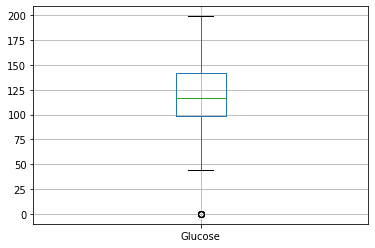

In [34]:
df[['Glucose']].boxplot()

<AxesSubplot:xlabel='Glucose'>

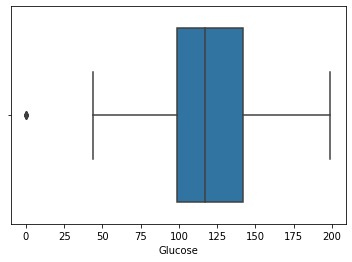

In [35]:
sns.boxplot(x = df['Glucose'])

In [36]:
q1 = df['Glucose'].quantile(0.25)
q3 = df['Glucose'].quantile(0.75)
iqr = q3 - q1
print("IQR :",iqr)
lower_tail = q1 - 1.5 * iqr
print("Lower Tail :",lower_tail)

upper_tail = q3 + 1.5 * iqr
print("Upper Tail :",upper_tail)

IQR : 43.0
Lower Tail : 34.5
Upper Tail : 206.5


In [37]:
df.loc[(df['Glucose'] < lower_tail) |
       (df['Glucose'] > upper_tail)]

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,0,48,20,0,24.7,0.140,22,0
182,0,74,20,23,27.7,0.299,21,0
342,0,68,35,0,32.0,0.389,22,0
349,0,80,32,0,41.0,0.346,37,1
502,0,68,41,0,39.0,0.727,41,1


In [38]:
df[['Glucose']].describe()

,Glucose
count,768.000000
mean,121.117188
std,31.805091
min,0.000000
25%,99.000000
50%,117.000000
75%,142.000000
max,199.000000


In [39]:
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,52,1
3,150,66,23,94,28.1,0.167,21,0
4,150,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


In [40]:
titanic_df= pd.read_csv('titanic.csv')
titanic_df

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<AxesSubplot:xlabel='Age', ylabel='Density'>

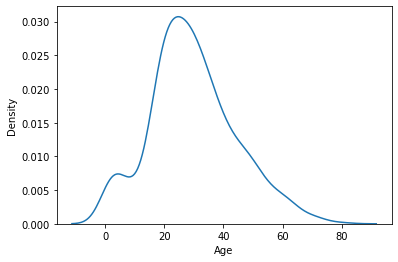

In [41]:
sns.kdeplot(titanic_df['Age'])

In [42]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### BiVariate Analysis

<AxesSubplot:xlabel='Age', ylabel='Gender'>

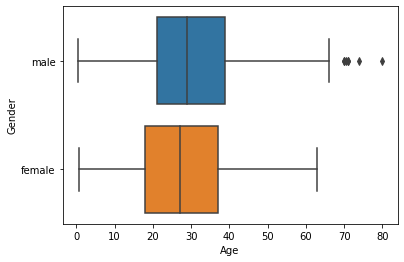

In [348]:
sns.boxplot(x = titanic_df['Age'] , y = titanic_df['Gender'] )

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

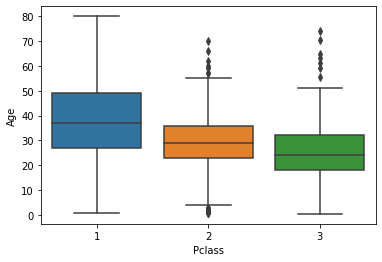

In [44]:
sns.boxplot(x = titanic_df['Pclass'],y = titanic_df['Age'] )

<AxesSubplot:xlabel='Survived', ylabel='Age'>

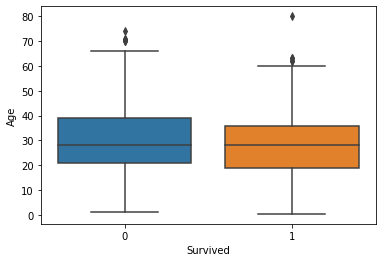

In [45]:
sns.boxplot(x = titanic_df['Survived'],y = titanic_df['Age'] )

<AxesSubplot:xlabel='Age'>

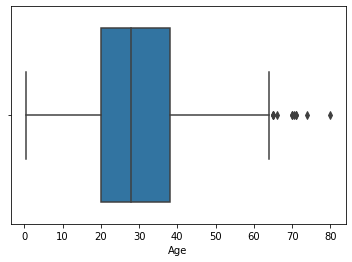

In [46]:
sns.boxplot(x =  titanic_df['Age'] )

In [47]:
df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,52,1
3,150,66,23,94,28.1,0.167,21,0
4,150,40,35,168,43.1,2.288,33,1


### MultiVariate Analysis

<AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Age'>

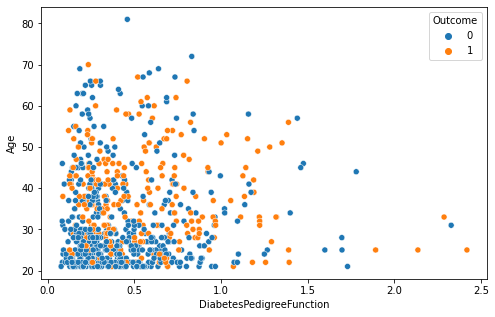

In [48]:
plt.figure(figsize = (8,5))
sns.scatterplot(x = df['DiabetesPedigreeFunction'],y = df['Age'], hue=df['Outcome'])

In [49]:
ins_df= pd.read_csv('medical_insurance.csv').head(300)
ins_df

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
295,18,male,22.990,0,no,northeast,1704.56810
296,19,male,27.700,0,yes,southwest,16297.84600
297,47,male,25.410,1,yes,southeast,21978.67690
298,31,male,34.390,3,yes,northwest,38746.35510


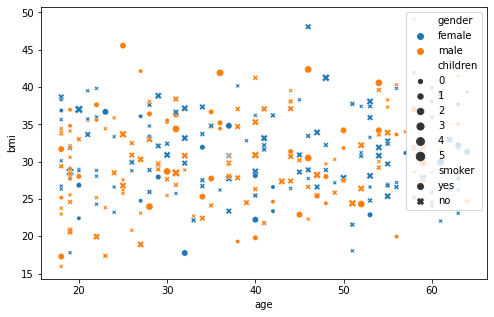

In [50]:
plt.figure(figsize = (8,5))
sns.scatterplot(x = ins_df['age'],y = ins_df['bmi'], hue = ins_df['gender'],
                style=ins_df['smoker'],
                size = ins_df['children'])

plt.legend()

In [51]:
iris_df = pd.read_csv('iris.csv')
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [52]:
# 5.1 , 1.4
iris_df1 = iris_df.head()

<AxesSubplot:xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

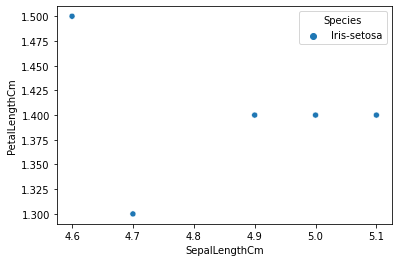

In [53]:
sns.scatterplot(x = iris_df1['SepalLengthCm'],y = iris_df1['PetalLengthCm'],hue = iris_df1['Species'])

<AxesSubplot:xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

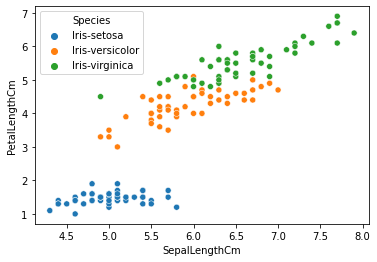

In [54]:
sns.scatterplot(x = iris_df['SepalLengthCm'],y = iris_df['PetalLengthCm'],hue = iris_df['Species'])

In [55]:
iris_df.loc[(iris_df['SepalLengthCm'] < 5) &
            (iris_df['PetalLengthCm'] > 4)]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
106,107,4.9,2.5,4.5,1.7,Iris-virginica


# Handling of Outliers

## 1. Delete Observations

In [58]:
df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,121.117188,69.076823,20.536458,79.799479,31.992578,0.471876,33.243490,0.348958
std,31.805091,19.367794,15.952218,115.244002,7.884160,0.331329,11.758182,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,142.000000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:xlabel='Age', ylabel='Density'>

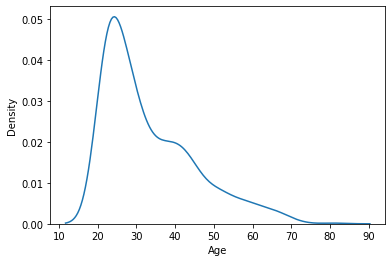

In [59]:
sns.kdeplot(df['Age'])

In [60]:
df['Age'].skew()

1.128632240693178

In [61]:
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)
iqr = q3 - q1
lower_tail = q1 - 1.5 * iqr
upper_tail = q3 + 1.5 * iqr
lower_tail

-1.5

<AxesSubplot:xlabel='Age'>

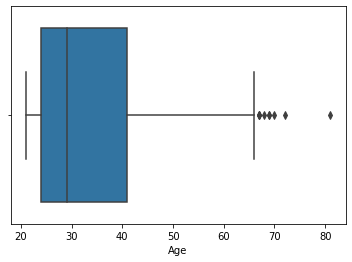

In [62]:
sns.boxplot(x =df['Age'])

In [63]:
df.loc[df['Age'] > upper_tail]

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
123,132,80,0,0,26.8,0.186,69,0
363,146,78,0,0,38.5,0.520,67,1
453,119,0,0,0,19.6,0.832,72,0
459,134,74,33,60,25.9,0.460,81,0
489,194,80,0,0,26.1,0.551,67,0
537,57,60,0,0,21.7,0.735,67,0
666,145,82,18,0,32.5,0.235,70,1
674,91,82,0,0,35.6,0.587,68,0
684,136,82,0,0,0.0,0.640,69,0


In [64]:
df.shape

(768, 8)

<AxesSubplot:xlabel='Age'>

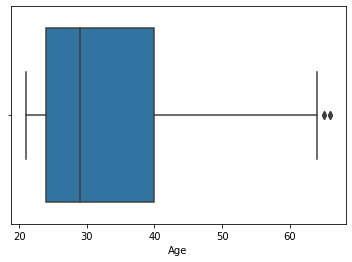

In [65]:
new_df = df.loc[df['Age'] <= upper_tail]
sns.boxplot(x =new_df['Age'])

In [66]:
q1 = new_df['Age'].quantile(0.25)
q3 = new_df['Age'].quantile(0.75)
iqr = q3 - q1
lower_tail = q1 - 2 * iqr
upper_tail = q3 + 2 * iqr
upper_tail

72.0

In [67]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.386083,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.487123,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='Fare'>

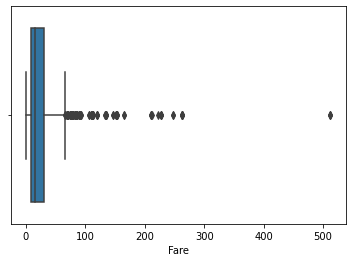

In [68]:
sns.boxplot(x = titanic_df['Fare'])

##### drop 

In [ ]:
df.drop([Columns_list or Rows_list], axis = 0)
axis = 1 >> Column
axis = 0 >> Rows

# 2. Imputation

### Extreme Outliers by using IQR

In [69]:
q1 = titanic_df['Fare'].quantile(0.25)
q3 = titanic_df['Fare'].quantile(0.75)
iqr = q3 - q1
lower_tail = q1 - 3 * iqr
upper_tail = q3 + 3 * iqr
upper_tail

100.2688

In [70]:
titanic_df.shape

(891, 12)

In [71]:
titanic_df.loc[titanic_df['Fare'] > upper_tail].shape

(53, 12)

In [72]:
new_titanic_df = titanic_df.loc[titanic_df['Fare'] <= upper_tail]
new_titanic_df

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [73]:
titanic_df = pd.read_csv('titanic.csv')
q1 = titanic_df['Fare'].quantile(0.25)
q3 = titanic_df['Fare'].quantile(0.75)
iqr = q3 - q1
lower_tail = q1 - 3 * iqr
upper_tail = q3 + 3 * iqr
upper_tail

100.2688

In [74]:
# titanic_df

In [75]:
titanic_df.loc[titanic_df['Fare'] > upper_tail, 'Fare'] = np.nan
# titanic_df.loc[titanic_df['Fare'] == upper_tail, 'Fare']

# KNNImputation 
# Linear Regression
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare            53
Cabin          687
Embarked         2
dtype: int64

In [76]:
# titanic_df.describe()

In [77]:
array2 = np.array([46, 45, 24, 28, 40, 56, 44, 39, 53, 25, 34, 42, 53, 37, 55, 50, 39,
       41, 45, 31])
array2
np.where(array2 > 40)

(array([ 0,  1,  5,  6,  8, 11, 12, 14, 15, 17, 18], dtype=int64),)

In [78]:
array2 = np.array([46, 45, 24, 28, 40, 56, 44, 39, 53, 25, 34, 42, 53, 37, 55, 50, 39,
       41, 45, 31])
array2
index = np.where(array2 <= 40)[0]
array2[index] = 100
array2

array([ 46,  45, 100, 100, 100,  56,  44, 100,  53, 100, 100,  42,  53,
       100,  55,  50, 100,  41,  45, 100])

In [79]:
array2 = np.array([46, 45, 24, 28, 40, 56, 44, 39, 53, 25, 34, 42, 53, 37, 55, 50, 39,
       41, 45, 31])
array2
index = np.where(array2 > 40)[0]
array2[index] = 200
array2

array([200, 200,  24,  28,  40, 200, 200,  39, 200,  25,  34, 200, 200,
        37, 200, 200,  39, 200, 200,  31])

In [83]:
array2 = np.array([46, 45, 24, 28, 40, 56, 44, 39, 53, 25, 34, 42, 53, 37, 55, 50, 39,
       41, 45, 31])

np.where(array2 <= 40, 0,1)

array([1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [84]:
array2 = np.array([46, 45, 24, 28, 40, 56, 44, 39, 53, 25, 34, 42, 53, 37, 55, 50, 39,
       41, 45, 31])

np.where(array2 <= 40, 0,array2)

array([46, 45,  0,  0,  0, 56, 44,  0, 53,  0,  0, 42, 53,  0, 55, 50,  0,
       41, 45,  0])

In [85]:
array2 = np.array([46, 45, 24, 28, 40, 56, 44, 39, 53, 25, 34, 42, 53, 37, 55, 50, 39,
       41, 45, 31])

np.where(array2 <= 40, array2,1)

array([ 1,  1, 24, 28, 40,  1,  1, 39,  1, 25, 34,  1,  1, 37,  1,  1, 39,
        1,  1, 31])

### Normal Outliers

In [86]:
df = pd.read_csv('diabetes.csv')
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)
iqr = q3 - q1
lower_tail = q1 - 1.5 * iqr
upper_tail = q3 + 1.5 * iqr
upper_tail

66.5

### Imputation Using np.where function

<AxesSubplot:xlabel='Age'>

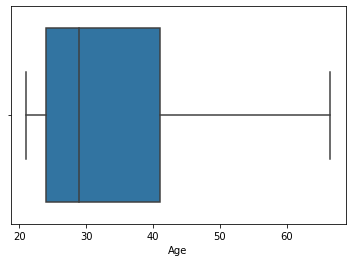

In [87]:
df['Age'] = np.where(df['Age'] > upper_tail, upper_tail, df['Age'])
sns.boxplot(x = df['Age'])

<AxesSubplot:xlabel='Age'>

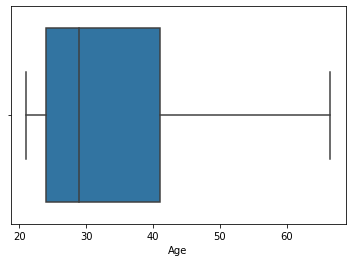

In [88]:
df['Age'] = np.where(df['Age'] > upper_tail, df['Age'].mean(), df['Age'])
sns.boxplot(x = df['Age'])

<AxesSubplot:xlabel='Age'>

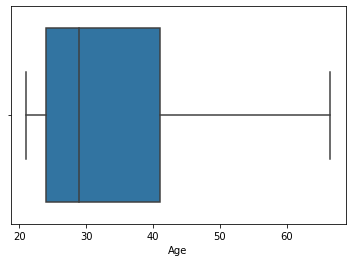

In [89]:
df['Age'] = np.where(df['Age'] > upper_tail, df['Age'].median(), df['Age'])
sns.boxplot(x = df['Age'])

<AxesSubplot:xlabel='Age'>

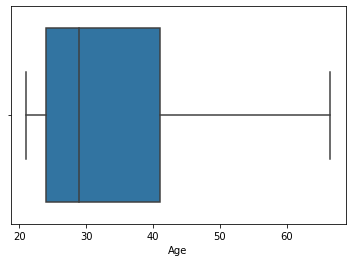

In [90]:
df['Age'] = np.where(df['Age'] > upper_tail, 50, df['Age'])
sns.boxplot(x = df['Age'])

In [91]:
# z-score

In [ ]:
titanic_df.loc[titanic_df['Fare'] > upper_tail, 'Fare'] = np.nan
# titanic_df.loc[titanic_df['Fare'] == upper_tail, 'Fare']

# KNNImputation 
# Linear Regression
titanic_df.isna().sum()

In [93]:
titanic_df = pd.read_csv('titanic.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:xlabel='Age', ylabel='Density'>

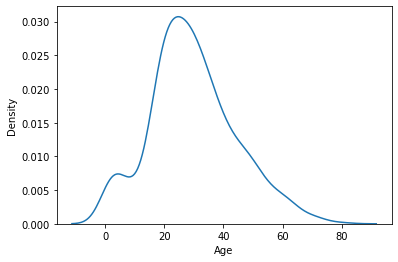

In [95]:
sns.kdeplot(titanic_df['Age'])

In [101]:
titanic_df['Age'].skew()

0.38910778230082704

4.787316519674893

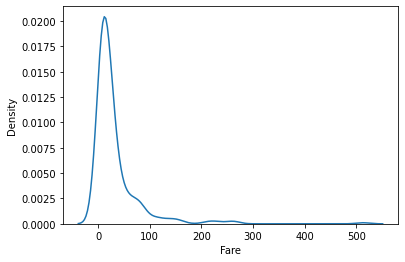

In [103]:
sns.kdeplot(titanic_df['Fare'])
titanic_df['Fare'].skew()

In [105]:
array2 = np.array([46, 45, 240, 28, 40, 56, 44, 39, 53, 25, 34, 42, 53, 37, 55, 50, 39,
       41, 45, 31])
mean = np.mean(array2)
print("Mean of an Array is :",mean)

std = np.std(array2)
print("Standard Deviation of an array is :",std)

Mean of an Array is : 52.15
Standard Deviation of an array is : 43.91500313104851


<AxesSubplot:xlabel='Glucose', ylabel='Density'>

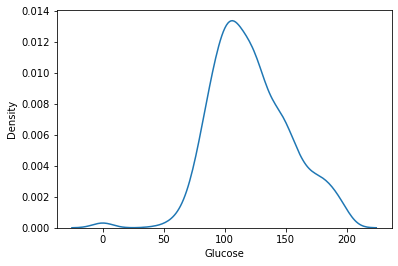

In [107]:
sns.kdeplot(df['Glucose'])

In [118]:
zscore_values = zscore(df['Glucose'])
outliers_index = np.where(np.abs(zscore_values) > 3)[0]
df.iloc[outliers_index]

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,0,48,20,0,24.7,0.140,22.0,0
182,0,74,20,23,27.7,0.299,21.0,0
342,0,68,35,0,32.0,0.389,22.0,0
349,0,80,32,0,41.0,0.346,37.0,1
502,0,68,41,0,39.0,0.727,41.0,1


In [119]:
df['Glucose'].describeribe()

count    768.000000
mean     121.117188
std       31.805091
min        0.000000
25%       99.000000
50%      117.000000
75%      142.000000
max      199.000000
Name: Glucose, dtype: float64

In [114]:
mean = np.mean(df['Glucose'])
print("Mean of an Array is :",mean)

std = np.std(df['Glucose'])
print("Standard Deviation of an array is :",std)

Mean of an Array is : 121.1171875
Standard Deviation of an array is : 31.784377982847335


In [123]:
lower_tail = mean - 3*std
upper_tail = mean + 3*std

### Percentile

In [ ]:
> 99%
<1%

95-99 %
1-5 %

In [136]:
array2 = np.array([46, 45, 240, 28, 40, 56, 44, 39, 53, 25, 34, 42, 53, 37, 55, 50, 39,
       41, 45, 31])
np.sort(array2)

array([ 25,  28,  31,  34,  37,  39,  39,  40,  41,  42,  44,  45,  45,
        46,  50,  53,  53,  55,  56, 240])

In [126]:
np.percentile(array2, 25)

38.5

In [127]:
np.percentile(array2, 50)

43.0

In [129]:
np.median(array2)

43.0

In [131]:
np.percentile(array2, 99)

205.03999999999976

In [133]:
np.percentile(array2, 1)

25.57

In [135]:
np.quantile(array2, 0.01)

25.57

In [146]:
array2 = np.array([46, 45, 100, 28,-15,40, 56, 44, 39, 53, 25, 34, 42, 53, 37, 55, 50, 39,
       41, 45, 31])

np.sort(array2)

array([-15,  25,  28,  31,  34,  37,  39,  39,  40,  41,  42,  44,  45,
        45,  46,  50,  53,  53,  55,  56, 100])

<AxesSubplot:ylabel='Density'>

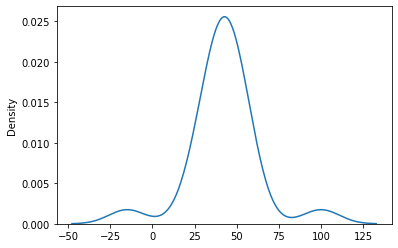

In [147]:
sns.kdeplot(array2)

In [149]:
skew(array2)

0.010056519403984401

In [153]:
array2 = np.array([46, 45, 100, 28,-15,40, 56, 44, 39, 53, 25, 34, 42, 53, 37, 55, 50, 39,
       41, 45, 31])
np.percentile(array2,5)

25.0

In [157]:
np.percentile(array2,95)

56.0

In [160]:
lower_tail = np.percentile(array2,1)

In [164]:
upper_tail = np.percentile(array2,99)
upper_tail

91.20000000000003

In [162]:
np.where(array2 < lower_tail, lower_tail, array2)

array([ 46.,  45., 100.,  28.,  -7.,  40.,  56.,  44.,  39.,  53.,  25.,
        34.,  42.,  53.,  37.,  55.,  50.,  39.,  41.,  45.,  31.])

In [165]:
new_array = np.where(array2 < lower_tail, lower_tail, 
                     np.where(array2 > upper_tail, upper_tail, array2))
new_array

array([46. , 45. , 91.2, 28. , -7. , 40. , 56. , 44. , 39. , 53. , 25. ,
       34. , 42. , 53. , 37. , 55. , 50. , 39. , 41. , 45. , 31. ])

<AxesSubplot:ylabel='Density'>

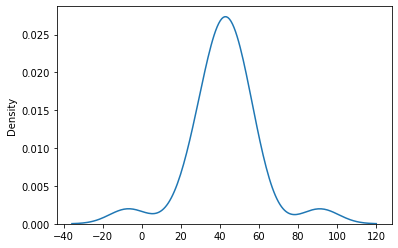

In [167]:
sns.kdeplot(new_array)

In [171]:
np.median(array2)

42.0

In [172]:
new_array = np.where(array2 < lower_tail, np.median(array2), 
                     np.where(array2 > upper_tail, np.median(array2), array2))
new_array

array([46., 45., 42., 28., 42., 40., 56., 44., 39., 53., 25., 34., 42.,
       53., 37., 55., 50., 39., 41., 45., 31.])

<AxesSubplot:ylabel='Density'>

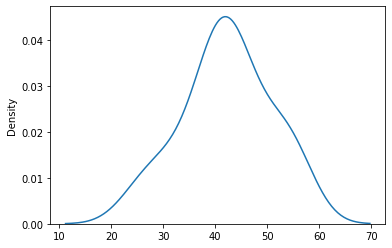

In [174]:
sns.kdeplot(new_array)

<AxesSubplot:ylabel='Density'>

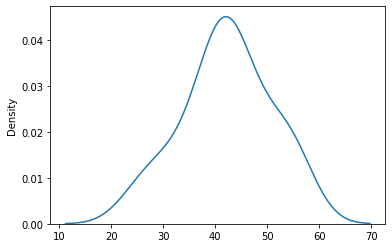

In [176]:
new_array = np.where(array2 < lower_tail, np.mean(array2), 
                     np.where(array2 > upper_tail, np.mean(array2), array2))
sns.kdeplot(new_array)

# Transformation

## 1. Log Transformation

In [ ]:
Natural Log >> np.log()
Right Skewed 

In [207]:
x = 1
print(np.log(x))
print(np.log2(x))
print(np.log10(x))

0.0
0.0
0.0


In [209]:
x = 0
print(np.log(x))
print(np.log2(x))
print(np.log10(x))

-inf
-inf
-inf


<ipython-input-209-fb567f6621af>:2: RuntimeWarning: divide by zero encountered in log
  print(np.log(x))
<ipython-input-209-fb567f6621af>:3: RuntimeWarning: divide by zero encountered in log2
  print(np.log2(x))
<ipython-input-209-fb567f6621af>:4: RuntimeWarning: divide by zero encountered in log10
  print(np.log10(x))


In [210]:
x = -10
print(np.log(x))
print(np.log2(x))
print(np.log10(x))

nan
nan
nan


<ipython-input-210-7f89944359d9>:2: RuntimeWarning: invalid value encountered in log
  print(np.log(x))
<ipython-input-210-7f89944359d9>:3: RuntimeWarning: invalid value encountered in log2
  print(np.log2(x))
<ipython-input-210-7f89944359d9>:4: RuntimeWarning: invalid value encountered in log10
  print(np.log10(x))


In [185]:
x = 2
print(np.log2(x))
print(np.log(x)) # 2.7
print(np.log10(x))

1.0
0.6931471805599453
0.3010299956639812


In [189]:
np.log(2.73)

1.0043016091968684

In [190]:
np.log10(10)

1.0

In [192]:
x = 5
print(np.log2(x))
print(np.log(x)) # 2.7
print(np.log10(x))

2.321928094887362
1.6094379124341003
0.6989700043360189


In [195]:
x = 50
print(np.log2(x))
print(np.log(x)) # 2.7
print(np.log10(x))

5.643856189774724
3.912023005428146
1.6989700043360187


In [198]:
x = 500
print(np.log2(x))
print(np.log(x)) # 2.7
print(np.log10(x))

8.965784284662087
6.214608098422191
2.6989700043360187


In [199]:
x = 5000
print(np.log2(x))
print(np.log(x)) # 2.7
print(np.log10(x))

12.287712379549449
8.517193191416238
3.6989700043360187


In [194]:
# titanic_df

In [197]:
# df

<AxesSubplot:xlabel='Age', ylabel='Density'>

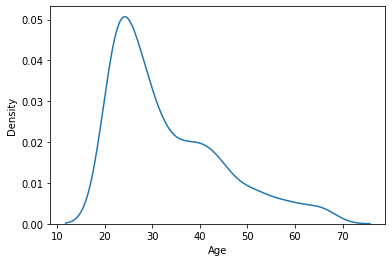

In [202]:
sns.kdeplot(df['Age'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

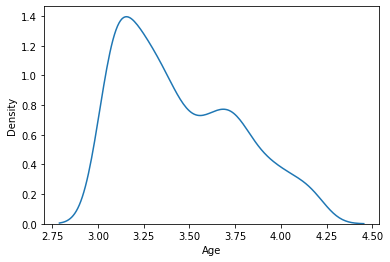

In [204]:
sns.kdeplot(np.log(df['Age']))

<AxesSubplot:xlabel='Age', ylabel='Density'>

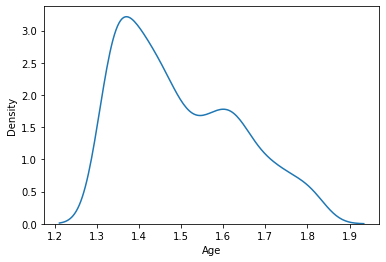

In [206]:
sns.kdeplot(np.log10(df['Age']))

<ipython-input-215-283a94b1d9a3>:4: RuntimeWarning: divide by zero encountered in log
  sns.kdeplot(np.log(array2))
c:\users\rahul\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:ylabel='Density'>

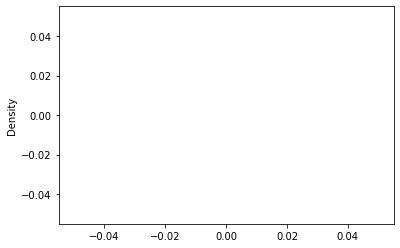

In [215]:
array2 = np.array([46, 45, 100, 28,0,40, 56, 44, 39, 53, 25, 34, 42, 53, 37, 55, 50, 39,
       41, 45, 31])

sns.kdeplot(np.log(array2))

In [217]:
from sklearn.preprocessing import FunctionTransformer

In [219]:
funtrans = FunctionTransformer(func = np.log)
funtrans.fit_transform(array2)

array([3.8286414 , 3.80666249, 4.60517019, 3.33220451,       -inf,
       3.68887945, 4.02535169, 3.78418963, 3.66356165, 3.97029191,
       3.21887582, 3.52636052, 3.73766962, 3.97029191, 3.61091791,
       4.00733319, 3.91202301, 3.66356165, 3.71357207, 3.80666249,
       3.4339872 ])

In [221]:
funtrans = FunctionTransformer(func = np.log1p)
funtrans.fit_transform(array2)

array([3.8501476 , 3.8286414 , 4.61512052, 3.36729583, 0.        ,
       3.71357207, 4.04305127, 3.80666249, 3.68887945, 3.98898405,
       3.25809654, 3.55534806, 3.76120012, 3.98898405, 3.63758616,
       4.02535169, 3.93182563, 3.68887945, 3.73766962, 3.8286414 ,
       3.4657359 ])

In [223]:
funtrans.transform([4,5,6,7,8])

array([1.60943791, 1.79175947, 1.94591015, 2.07944154, 2.19722458])

In [226]:
funtrans = FunctionTransformer(func = np.log1p)
funtrans.fit(array2)

FunctionTransformer(func=<ufunc 'log1p'>)

In [230]:
funtrans.transform(array2) 

array([3.8501476 , 3.8286414 , 4.61512052, 3.36729583, 0.        ,
       3.71357207, 4.04305127, 3.80666249, 3.68887945, 3.98898405,
       3.25809654, 3.55534806, 3.76120012, 3.98898405, 3.63758616,
       4.02535169, 3.93182563, 3.68887945, 3.73766962, 3.8286414 ,
       3.4657359 ])

In [231]:
funtrans.fit_transform(array2)  # fit + Transform

array([3.8501476 , 3.8286414 , 4.61512052, 3.36729583, 0.        ,
       3.71357207, 4.04305127, 3.80666249, 3.68887945, 3.98898405,
       3.25809654, 3.55534806, 3.76120012, 3.98898405, 3.63758616,
       4.02535169, 3.93182563, 3.68887945, 3.73766962, 3.8286414 ,
       3.4657359 ])

In [232]:
funtrans.transform([4,63,1,4,6,7])

array([1.60943791, 4.15888308, 0.69314718, 1.60943791, 1.94591015,
       2.07944154])

<AxesSubplot:xlabel='Age'>

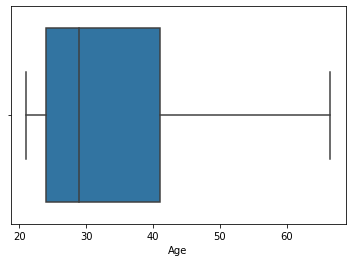

In [240]:
sns.boxplot(x = df['Age'])

<AxesSubplot:xlabel='Age'>

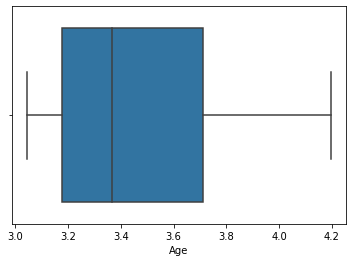

In [242]:
sns.boxplot(x = np.log(df['Age']))

In [247]:
boston_data = load_boston()
boston_df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


<AxesSubplot:>

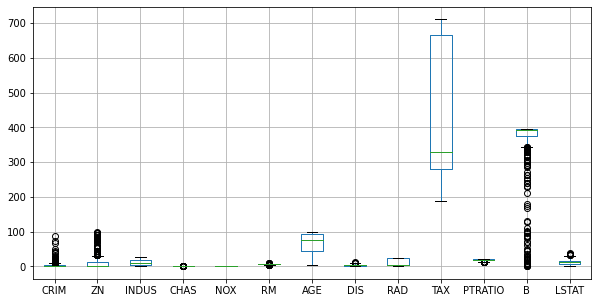

In [252]:
plt.figure(figsize = (10,5))
boston_df.boxplot()

<AxesSubplot:xlabel='DIS'>

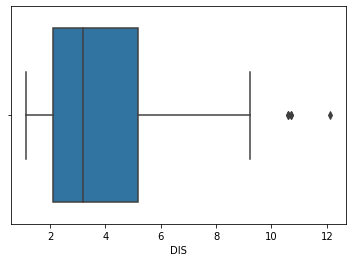

In [255]:
sns.boxplot(x = boston_df['DIS'])

<AxesSubplot:xlabel='DIS'>

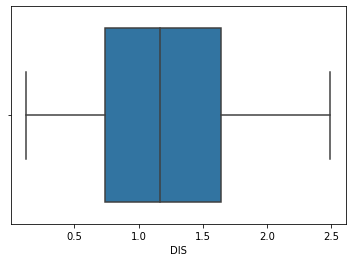

In [258]:
sns.boxplot(x = np.log(boston_df['DIS']))

In [ ]:
sns.boxplot(x = np.log(boston_df['DIS']))

<AxesSubplot:xlabel='DIS'>

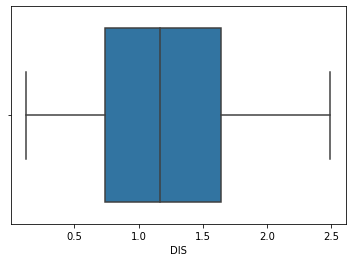

In [261]:
funtrans = FunctionTransformer(func = np.log)
trans_values = funtrans.fit_transform(boston_df['DIS'])
sns.boxplot(x = trans_values)

## 2. sqaure root()

<AxesSubplot:xlabel='DIS'>

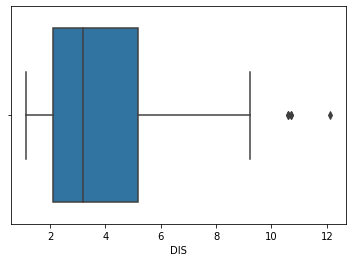

In [263]:
sns.boxplot(x = boston_df['DIS'])

<AxesSubplot:xlabel='DIS'>

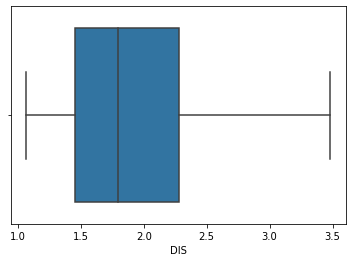

In [265]:
sns.boxplot(x = np.sqrt(boston_df['DIS']))

## 3. square transformation

In [270]:
Left Skewed 

<AxesSubplot:ylabel='Density'>

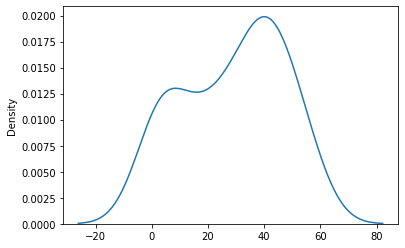

In [277]:
array2 = np.array([46, 45, 10, 28,0,40, 56, 44,15,18,19, 1,1,2,4,5,6,7,39, 53,20,30,40,25,35, 25, 34, 42, 53, 37, 55, 50, 39,
       41, 45, 31])

sns.kdeplot(array2)
# skew(array2)

<AxesSubplot:>

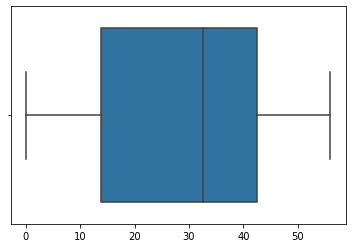

In [280]:
sns.boxplot(x = array2)

<AxesSubplot:>

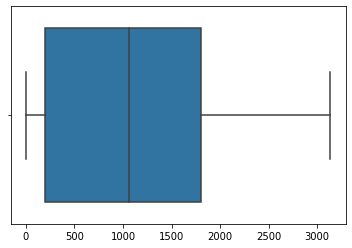

In [281]:
sns.boxplot(x = array2 ** 2)

## 4. Reciprocal 

In [ ]:
High >> low
Low >> High

x = 1000
1/1000  >> 0.001

x = 10
1/10 >> 0.1

In [284]:
boston_df['B']

0      396.90
1      396.90
2      392.83
3      394.63
4      396.90
        ...  
501    391.99
502    396.90
503    396.90
504    393.45
505    396.90
Name: B, Length: 506, dtype: float64

<AxesSubplot:xlabel='B', ylabel='Density'>

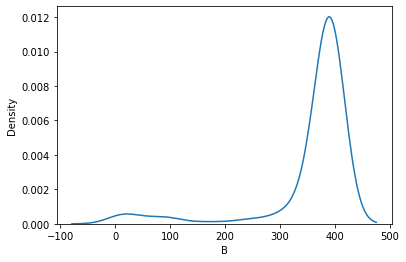

In [286]:
sns.kdeplot(boston_df['B'])

<AxesSubplot:xlabel='B', ylabel='Density'>

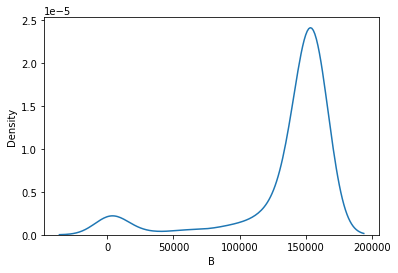

In [288]:
sns.kdeplot(boston_df['B'] ** 2)

<AxesSubplot:xlabel='B', ylabel='Density'>

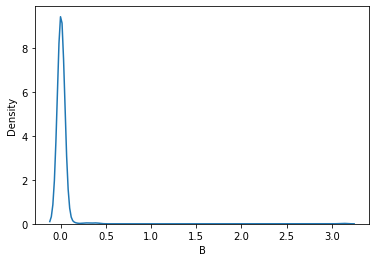

In [292]:
sns.kdeplot(1/boston_df['B'])

## 5. Cuberoot

<AxesSubplot:xlabel='AGE', ylabel='Density'>

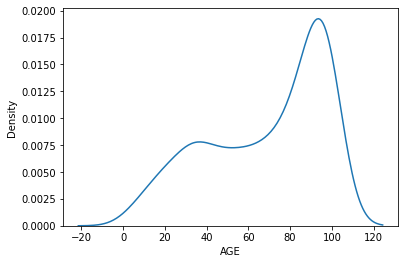

In [294]:
sns.kdeplot(boston_df['AGE'])

<AxesSubplot:xlabel='AGE', ylabel='Density'>

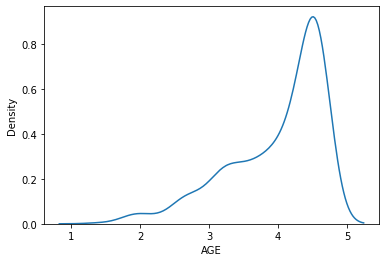

In [299]:
sns.kdeplot(np.cbrt(boston_df['AGE']))

<AxesSubplot:xlabel='AGE'>

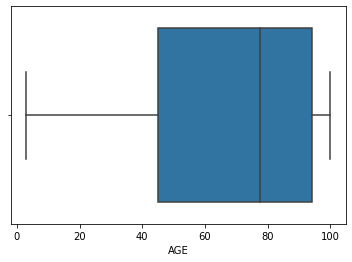

In [298]:
sns.boxplot(x = boston_df['AGE'])

## 6. boxCox Transformation

In [ ]:
Skewed Data:
    Positive Values

In [ ]:
Power Transformer:
    1. Box-Cox Transformer
    2. Yeo-Johnson Transformer

In [302]:
from scipy.stats import boxcox

<AxesSubplot:xlabel='Age'>

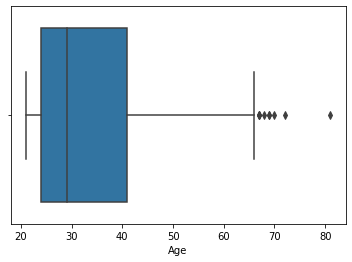

In [314]:
diabetes_df = pd.read_csv('diabetes.csv')
sns.boxplot(x = diabetes_df['Age'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

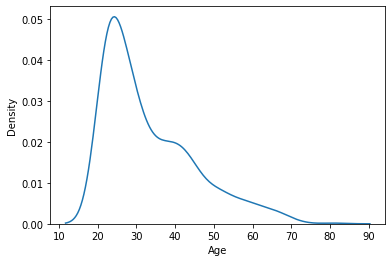

In [316]:
sns.kdeplot(diabetes_df['Age'])

0.14634729789600107

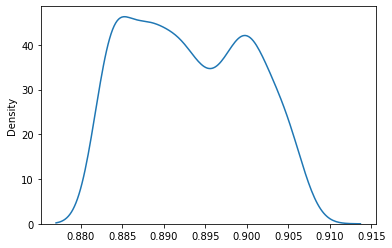

In [326]:
age1 = boxcox(diabetes_df['Age'])[0]
sns.kdeplot(age1)
skew(age1)

<AxesSubplot:>

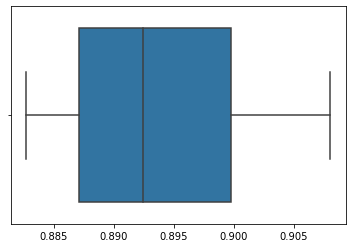

In [328]:
sns.boxplot(x = age1)

In [ ]:
sns.boxplot(x = age1)

<AxesSubplot:xlabel='AGE'>

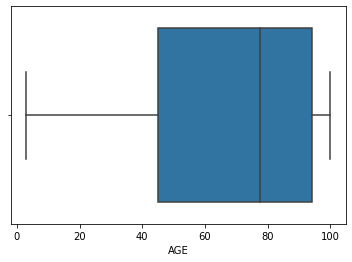

In [332]:
sns.boxplot(x = boston_df['AGE'])

<AxesSubplot:>

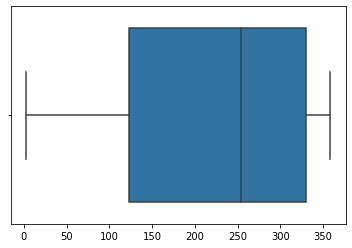

In [336]:
sns.boxplot(x = boxcox(boston_df['AGE'])[0])

<AxesSubplot:ylabel='Density'>

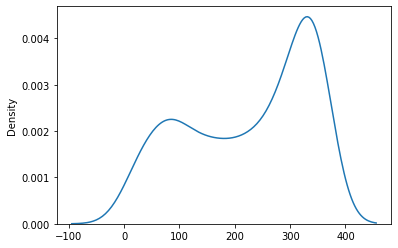

In [335]:
sns.kdeplot(boxcox(boston_df['AGE'])[0])

## 7. Yeo-Johnson Transformer

In [ ]:
Apply a power transform featurewise to make data more Gaussian-like.
Gaussian >> Normal Distribution

In [338]:
from sklearn.preprocessing import PowerTransformer

<AxesSubplot:xlabel='Age'>

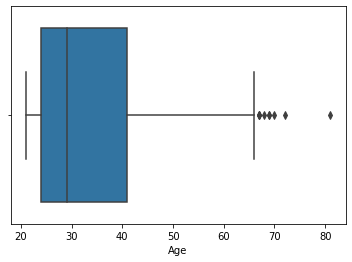

In [346]:
diabetes_df = pd.read_csv('diabetes.csv')
sns.boxplot(x = diabetes_df['Age'])

<AxesSubplot:>

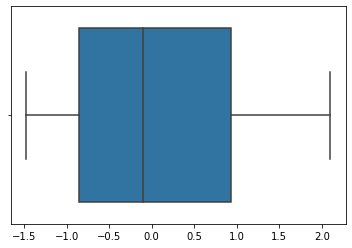

In [345]:
power_trans = PowerTransformer()
age2 = power_trans.fit_transform(diabetes_df[['Age']])[:,0]
sns.boxplot(x = age2)